In [40]:
import pandas as pd
df=pd.read_csv("Mall_Customers.csv.")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [41]:
df.shape

(200, 5)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [43]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


k Means clustering in python

In [44]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt


In [45]:
df=pd.read_csv("Mall_Customers.csv")

In [46]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [47]:
# Define K-means model
kmeans_model = KMeans(init='k-means++',  max_iter=400, random_state=42)

In [48]:
# Train the model
kmeans_model.fit(df[['Annual Income (k$)','Spending Score (1-100)',
'Age']])

KMeans(max_iter=400, random_state=42)

Finding the optimal number of clusters

In [49]:
# Create the K means model for different values of K
def try_different_clusters(K, data):
       
    cluster_values = list(range(1, K+1))
    inertias=[]
    
    for c in cluster_values:
        model = KMeans(n_clusters = c,init='k-means++',max_iter=400,random_state=42)
        model.fit(data)
        inertias.append(model.inertia_)
    
    return inertias

In [50]:
# Find output for k values between 1 to 12 
outputs = try_different_clusters(12, df[['Annual Income (k$)','Spending Score (1-100)','Age']])
distances = pd.DataFrame({"clusters": list(range(1, 13)),"sum of squared distances": outputs})

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



In [51]:
# Finding optimal number of clusters k
figure = go.Figure()
figure.add_trace(go.Scatter(x=distances["clusters"], y=distances["sum of squared distances"]))

figure.update_layout(xaxis = dict(tick0 = 1,dtick = 1,tickmode = 'linear'),                  
                  xaxis_title="Number of clusters",
                  yaxis_title="Sum of squared distances",
                  title_text="Finding optimal number of clusters using elbow method")
figure.show()

In [52]:
# Re-Train K means model with k=5
kmeans_model_new = KMeans(n_clusters = 5,init='k-means++',max_iter=400,random_state=42)

kmeans_model_new.fit_predict(df[['Annual Income (k$)','Spending Score (1-100)','Age']])

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 3,
       0, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 2, 1, 3, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

Visualizing customer segments

In [53]:
# Create data arrays
cluster_centers = kmeans_model_new.cluster_centers_
data = np.expm1(cluster_centers)
points = np.append(data, cluster_centers, axis=1)
points

array([[2.65358566e+11, 1.20898074e+09, 4.34173717e+19, 2.63043478e+01,
        2.09130435e+01, 4.52173913e+01],
       [3.82980197e+37, 4.65399911e+35, 1.57793399e+14, 8.65384615e+01,
        8.21282051e+01, 3.26923077e+01],
       [9.36317078e+37, 7.93349385e+07, 3.25560375e+17, 8.74324324e+01,
        1.81891892e+01, 4.03243243e+01],
       [6.44514846e+23, 4.39802724e+21, 5.36582750e+18, 5.48227848e+01,
        4.98354430e+01, 4.31265823e+01],
       [1.49009027e+11, 2.93217129e+34, 9.45814564e+10, 2.57272727e+01,
        7.93636364e+01, 2.52727273e+01]])

In [54]:
# Add "clusters" to customers data
points = np.append(points, [[0], [1], [2], [3], [4]], axis=1)
df["clusters"] = kmeans_model_new.labels_

In [55]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,4
2,3,Female,20,16,6,0
3,4,Female,23,16,77,4
4,5,Female,31,17,40,0


In [56]:
# visualize clusters
figure = px.scatter_3d(df,
                    color='clusters',
                    x="Annual Income (k$)",
                    y="Spending Score (1-100)",
                    z="Age",            
                    category_orders = {"clusters": ["0", "1", "2", "3", "4"]}                    
                    )
figure.update_layout()
figure.show()

In [57]:
corr_matrix = df.corr()
print(corr_matrix.Age.sort_values(ascending=False))

Age                       1.000000
Annual Income (k$)       -0.012398
CustomerID               -0.026763
clusters                 -0.092939
Spending Score (1-100)   -0.327227
Name: Age, dtype: float64


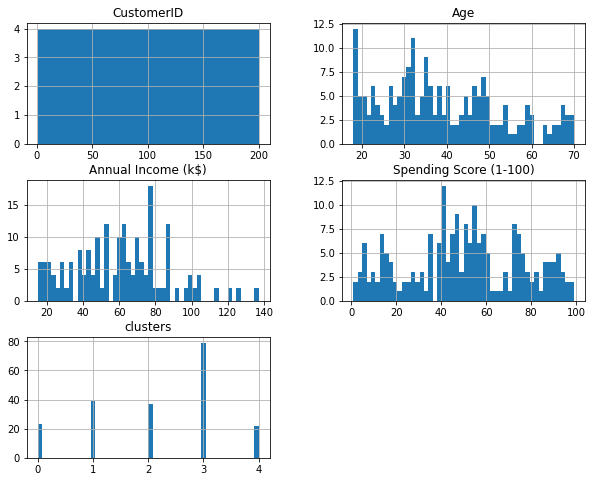

In [60]:
import matplotlib.pyplot as plt
df.hist(bins=50, figsize=(10, 8))
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

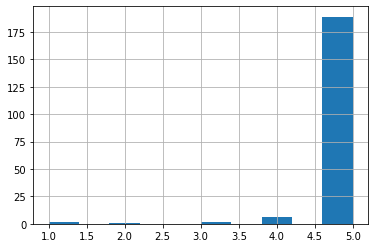

In [65]:
import numpy as np
df['Annual Income (k$)'] = pd.cut(df['Spending Score (1-100)'], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])
df['Annual Income (k$)'].hist()
plt.show()